In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
print(f'X ndim: {X.ndim}, y ndim: {y.ndim}')
print(f'X shape: {X.shape}, y shape: {y.shape}')
print(f'X dtype: {X.dtype}, y dtype {y.dtype}')
print(f'Class label distribution: {np.bincount(y)}')

X ndim: 2, y ndim: 1
X shape: (150, 4), y shape: (150,)
X dtype: float64, y dtype int64
Class label distribution: [50 50 50]


In [4]:
import random

n_train = int(X.shape[0] * 0.75)    # The number of observations in the training dataset: 112

indices = np.arange(start=0, stop=X.shape[0], step=1)  # Creating an array with the indices from 0 to 150 as array elements.

random.shuffle(x=indices)     # Shuffling the indices (in place)

train_indices = indices[:n_train]   # From 0 --> 112
val_indices = indices[n_train:]     # From 112 --> 150

X_train, y_train = X[train_indices, :], y[train_indices]    # We used train_indices
X_validate, y_validate = X[val_indices, :], y[val_indices]  # We used val_indices

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
accuracy_list = []
for k in range(1, X_train.shape[0]):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_validate)
    acc = accuracy_score(y_validate, predictions)
    accuracy_list.append(acc)
accuracy = np.array(accuracy_list)

In [7]:
max_acc = np.max(accuracy)
first_k = np.argmax(accuracy)
max_acc_indices = np.where(accuracy == max_acc)[0]
max_acc_indices
accuracy[max_acc_indices]

k_array = np.arange(1, X_train.shape[0])
print(f'Highest accuracy: {max_acc:.2f} at k: {first_k}')

Highest accuracy: 1.00 at k: 4


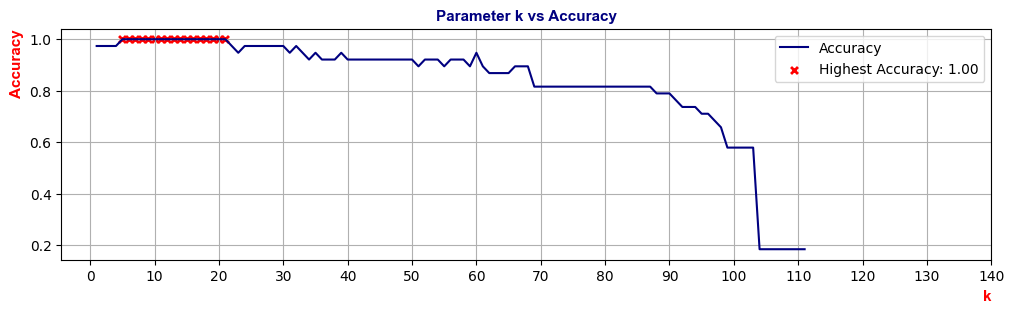

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(k_array, accuracy, color='navy', label='Accuracy')

plt.scatter(k_array[max_acc_indices], accuracy[max_acc_indices], marker='x', color='red', s=25, linewidths=2, label=f'Highest Accuracy: {max_acc:.2f}')

plt.title('Parameter k vs Accuracy', fontdict={'color': 'navy', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.xlabel('k', loc='right', fontdict={'color': 'red', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.ylabel('Accuracy', loc='top', fontdict={'color': 'red', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.xticks(ticks=range(0, X.shape[0], 10))
plt.legend()
plt.grid(visible=True)
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X=X_train)   # MinMaxScaler should be fitted using only the training data

In [12]:
X_train_scaled = scaler.transform(X=X_train)
X_validate_scaled = scaler.transform(X=X_validate)

Highest accuracy: 1.00 at k: 6


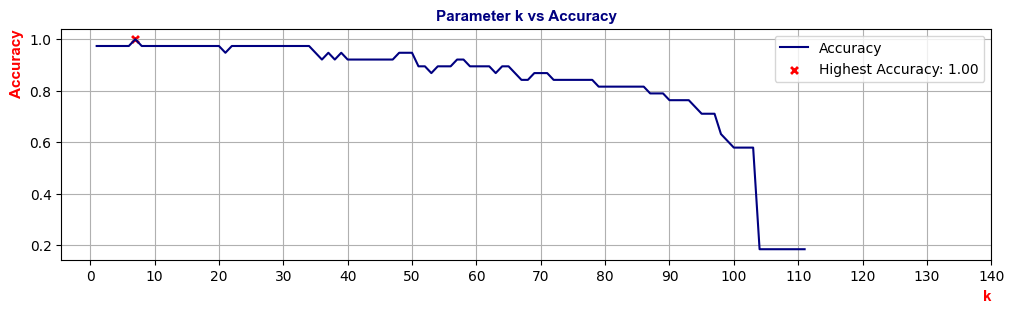

In [14]:
accuracy_list = []
for k in range(1, X_train.shape[0]):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    predictions = knn_model.predict(X_validate_scaled)
    acc = accuracy_score(y_validate, predictions)
    accuracy_list.append(acc)
accuracy = np.array(accuracy_list)

max_acc = np.max(accuracy)
first_k = np.argmax(accuracy)
max_acc_indices = np.where(accuracy == max_acc)[0]
max_acc_indices
accuracy[max_acc_indices]

k_array = np.arange(1, X_train.shape[0])
print(f'Highest accuracy: {max_acc:.2f} at k: {first_k}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(k_array, accuracy, color='navy', label='Accuracy')

plt.scatter(k_array[max_acc_indices], accuracy[max_acc_indices], marker='x', color='red', s=25, linewidths=2, label=f'Highest Accuracy: {max_acc:.2f}')

plt.title('Parameter k vs Accuracy', fontdict={'color': 'navy', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.xlabel('k', loc='right', fontdict={'color': 'red', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.ylabel('Accuracy', loc='top', fontdict={'color': 'red', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.xticks(ticks=range(0, X.shape[0], 10))
plt.legend()
plt.grid(visible=True)
plt.show()